In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions_for_visualize import (visualize, 
                                    visualize_gradient_descent,
                                    visualize_logistic_loss)
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')

In [3]:
def get_test_data(num_samples=100):
    X = np.ones((num_samples, 2))
    X[:, 0] = np.random.uniform(-1., 1., num_samples)
    a = np.array([5, 7])
    Y = X.dot(a) + np.random.rand(num_samples)
    return X[:, 0], Y


def get_real_data():
    import pandas as pd
    df = pd.read_csv('src/states.csv')
    x, y = df.hs_grad, df.poverty
    scaled_x = (x - x.mean()) / x.std()
    scaled_y = (y - y.mean()) / y.std()
    return scaled_x, scaled_y

## <center>Activation Functions
---

### Sigmod Function

|Уравнение            |${\displaystyle f(x)=\sigma (x)={\frac {1}{1+e^{-x}}}}$|
|:-------------------:|:------------------------------------------------------ |
|Производная по ($x$) | ${\displaystyle f'(x)=f(x)(1-f(x))}$|
| Область значения    | $(0,1)$|

Выход сигмоидальной функции интерпретируется как вероятность того, что определённый образец принадлежит классу 1, $f(z) = P(z =  1)$

**Преимущества:**
1. Плавный градиент. Это очень полезно для классификаторов.
2. Значение выходного сигнала всегда находится в диапазоне от 0 до 1

**Недостатки:**

1. Сигмоида - это своего рода экспоненциальная базовая функция, и это немного тяжелая операция.
2. Для значений, превышающих 3 или меньших, чем -3, градиенты будут очень малыми. Поскольку значение градиента приближается к нулю, сеть на самом деле не обучается. Это порождает проблему “исчезающих градиентов”.
3. Сеть отказывается учиться дальше или работает крайне медленно.

Как можно заметить, значения градиента (оранжевая линия) всегда меньше 0.25 и доходят до очень низких значений, когда выход приближается к 0 или 1. Это означает, что когда вы умножаете множество сигмоидных градиентов, умножается и множество значений, которые потенциально гораздо меньше нуля - это приводит к исчезновению градиента (он становится практически нулевой), следовательно веса не подстраиваются под эти новые значения и не учитывают их.

**Пример**
- Логистическа регрессия
- Многослойная нейронная сеть

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

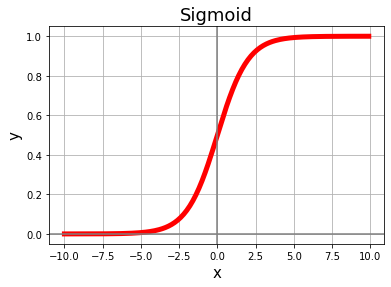

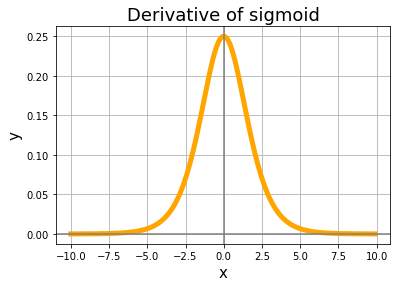

In [20]:
visualize(sigmoid)
visualize(derivative_sigmoid, c='orange')

###  Tanh Function

|Уравнение            |${\displaystyle f(x)=\mathrm {th} \,(x)={\frac {(e^{x}-e^{-x})}{(e^{x}+e^{-x})}}}$|
|:-------------------:|:------------------------------------------------------ |
|Производная по ($x$) | ${\displaystyle f'(x)=1-f(x)^{2}}$|
| Область значения    | $(-1,1)$|

Также называется гиперболический тангенс.
<br>Интерпретируется как масштабированная версия логистической функции ${\displaystyle \mathrm {th} (x)= 2 \sigma (2x) - 1 = {\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}$

**Преимущества:**

1. Градиент для _tanh_ сильнее, чем для сигмоиды ( производная круче), это может улучшить сходимость алгоритма.
2. Значение выходного сигнала всегда находится в диапазоне от -1 до 1.
3. Обычно используется в скрытых слоях нейронной сети, поскольку ее значения находятся в диапазоне от -1 до 1, следовательно, среднее значение для скрытого слоя получается равным 0 или очень близким к нему, что помогает центрировать данные, приближая среднее значение к 0. Это значительно облегчает обучение для следующего слоя
4. Эта функция очень полезна для нормализации наборов данных.

**Недостатки:**

1. У _tanh_ также есть проблема исчезающего градиента.
2. Это также своего рода экспоненциальная базовая функция, поэтому это немного тяжелая операция

**Пример:**
- Рекуррентные нейронные сети
- Многослойная нейронная сеть

In [21]:
def tanh(x):
    return ((np.exp(x) - np.exp(-x))/ 
            (np.exp(x) + np.exp(-x)))

def derivative_tanh(x):
    return 1-np.square(tanh(x))

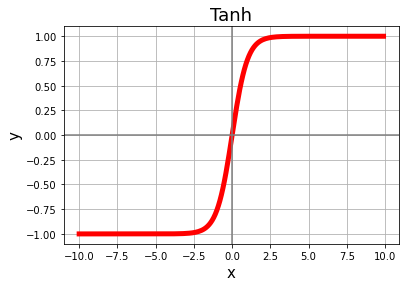

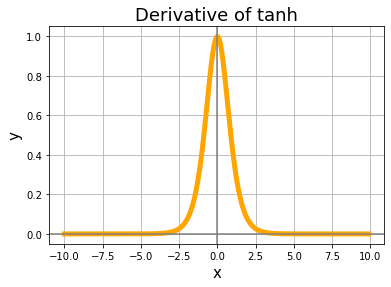

In [22]:
visualize(tanh)
visualize(derivative_tanh, c='orange')

### ReLU (Rectified Linear Unit)

|Уравнение            |${\displaystyle f(x)={\begin{cases}0&x<0\\x&x\geqslant 0\end{cases}}}$|
|:-------------------:|:------------------------------------------------------ |
|Производная по ($x$) | ${\displaystyle f'(x)={\begin{cases}0&x<0\\1&x\geqslant 0\end{cases}}}$|
| Область значения    | $[0,\infty)$|


**Преимущества:**

1. Производная относительно входа всегда равна 1 для положительных входных значений
2. Это показывает, что нейроны будут деактивированы только в том случае, если результат линейного преобразования меньше 0, и активированы только в том случае, если он больше 0.
3. Для отрицательных входных значений результат равен нулю, что означает, что нейрон не активируется. Поскольку активируется только определенное количество нейронов, функция ReLU гораздо более эффективна в вычислительном отношении по сравнению с функцией сигмоиды и tanh.
4. Главное преимущество будет заключаться в том, что не будет проблемы с исчезающим градиентом

**Недостатки:**

1. ReLU не всегда достаточно надежна и в процессе обучения может выходить из строя («умирать»). Например, большой градиент, проходящий через ReLU, может привести к такому обновлению весов, что данный нейрон никогда больше не активируется. Если это произойдет, то, начиная с данного момента, градиент, проходящий через этот нейрон, всегда будет равен нулю. Соответственно, данный нейрон будет необратимо выведен из строя. Например, при слишком большой скорости обучения (learning rate), может оказаться, что до 40% ReLU «мертвы» (то есть, никогда не активируются). Эта проблема решается посредством выбора надлежащей скорости обучения.
2. Эта функция может использоваться только в скрытых слоях модели нейронной сети

**Пример:**
- Сверточные сети
- Многослойная нейронная сеть


In [23]:
def relu(x):
    return np.maximum(0, x)

def derivative_relu(x):
    return x > 0.0

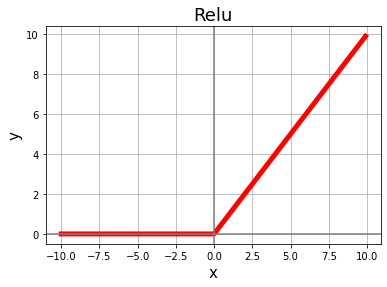

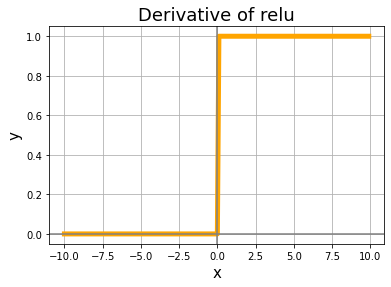

In [24]:
visualize(relu)
visualize(derivative_relu, c='orange')

###  PReLU (Parameterised ReLU)

|Уравнение            |${\displaystyle f(x)={\begin{cases} \alpha x&x<0\\x&x\geqslant 0\end{cases}}}$|
|:-------------------:|:------------------------------------------------------ |
|Производная по ($x$) | ${\displaystyle f'(x)={\begin{cases}\alpha&x<0\\1&x\geqslant 0\end{cases}}}$|
| Область значения    | $(-\infty,\infty)$|

Сделав эту небольшую модификацию, градиент левой части графика становится ненулевым значением. Что не вызывает дезактивацию нейронов.


**Пример:**
- Сверточные сети
- Многослойная нейронная сеть

In [25]:
def prelu(x, alpha=0.1):
    return np.maximum(alpha*x, x)

def derivative_prelu(x, alpha=0.1):
    return alpha if x < 0 else 1

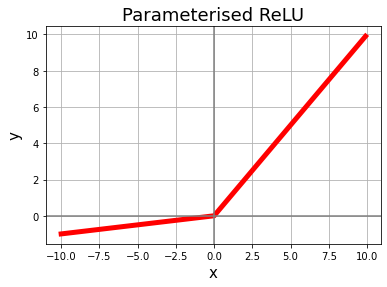

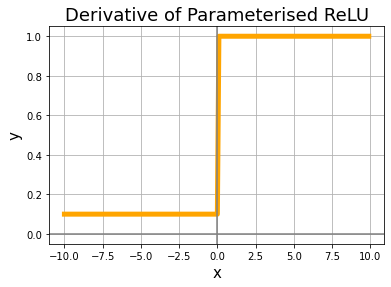

In [26]:
visualize(prelu, title='Parameterised ReLU')
visualize(np.vectorize(derivative_prelu), c='orange', title='Derivative of Parameterised ReLU')

###  Softplus

|Уравнение            |$ {\displaystyle f(x)=\ln(1+e^{x})}$|
|:-------------------:|:------------------------------------------------------ |
|Производная по ($x$) | ${\displaystyle f'(x)={\frac {1}{1+e^{-x}}}}$|
| Область значения    | ${\displaystyle (0,\infty )}$|


<br>Эта функция почти эквивалентна функции Relu.
<br>Softplus является более гладкой функцией по сравнению с функцией Relu.
<br>Градиент также будет плавным по отношению к функции Relu.

In [27]:
def softplus(x):
    return np.log((1 + np.exp(x)))

def derivative_softplus(x):
    return 1/(1+np.exp(-x))

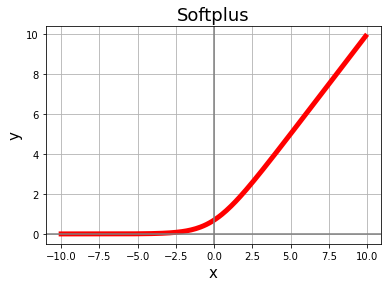

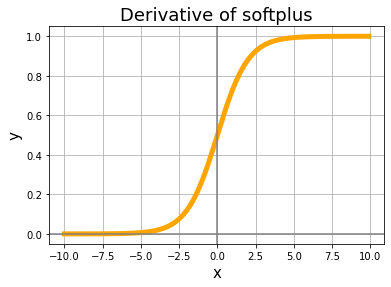

In [28]:
visualize(softplus)
visualize(derivative_softplus, c='orange')

###  Softmax

|Уравнение            |$ {\displaystyle f_{i}({\vec {x}})={\frac {e^{x_{i}}}{\sum _{j=1}^{J}e^{x_{j}}}}}   \text{ для } i = 1, …, J$|
|:-------------------:|:------------------------------------------------------ |
|Производные | $	{\displaystyle {\frac {\partial f_{i}({\vec {x}})}{\partial x_{j}}}=f_{i}({\vec {x}})(\delta _{ij}-f_{j}({\vec {x}}))}$|
| Область значения    | $(0,1)$|

Координаты ${\displaystyle f_{i}}$ полученного вектора при этом трактуются как вероятности того, что объект принадлежит к классу ${\displaystyle i}$.

**Пример:**
   - Многоклассовая классификация
   - Часто Softmax используется для последнего слоя глубоких нейронных сетей для задач классификации.

In [29]:
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

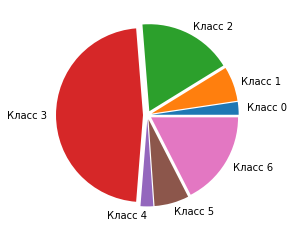

In [30]:
x = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]

plt.pie(softmax(x),
        labels= [f'Класс {i}' for i in range(len(x))],
        explode=[0.05]*len(x))
plt.show() 

## <center>Loss Functions
---

In [31]:
def gradient_descent(X, Y,
                     update_weights_function, loss_function,
                     w_initial=10, b_initial=10,
                     n_iter=50, learning_rate=0.3, ):
    """
    Arguments:
        update_weights_function (func(w, b, X, Y, learning_rate))
            Функция для обновления весов.
        loss_function (func(yhat, y))
            Функция для оценки точности алгоритма.
        w_initial, b_initial (float)
            Начальные значения веса и смещения.
        n_iter (int) = 50
             Количесто проходов по обучающему набору данных
        learning_rate (float) = 0.1
             Скорость обучения между 0.0 и 1.0
    """
    # Два списка для хранения точек градиентного спуска
    wlist = [w_initial]
    blist = [b_initial]

    costs = []

    for _ in range(n_iter):
        previous_w = wlist[-1]
        previous_b = blist[-1]

        w_new, b_new = update_weights_function(previous_w, previous_b,
                                               X, Y, learning_rate)

        if (np.abs(np.abs(previous_w) - np.abs(w_new)) < 0.01):
            break

        output = X * w_new + b_new
        cost = loss_function(Y, output)  # Отклонения расчетных результатов от истинных меток
        costs.append(cost)

        wlist.append(w_new)
        blist.append(b_new)
    return wlist, blist, costs

### L1 and L2 loss function:

$ \begin{array}{l}
  L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \rightarrow min \\
  L_2(\hat{y}, y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \rightarrow min
\end{array}$

 
- $L1$ и $L2$ - это две основных функции потерь, которые используются в глубоком обучении для минимизации ошибок.
- $L1$  также называется _Least absolute derivations_,
<br>$L2$ называется _Least square error_.

**Достоинства:** 
1. Нет локального минимума. Градиентный спуск будет сходиться к глобальному минимуму (если он полностью сходится). 


**Недостатки:** 

1. Функция потерь $L2$ штрафует большие ошибки, сделанные моделью. Если возвести в квадрат большее число, оно станет больше. Поэтому, если данные подвержены множеству выбросов, $L2$ не следует использовать.

In [32]:
def L1(yhat, y):
    """
    Arguments:
        yhat - predicted labels
        y - true labels
    """
    loss = np.sum(np.absolute(y-yhat))
    return loss

def L2(yhat, y):
    """
    Arguments:
        yhat - predicted labels
        y - true labels
    """
    loss = np.sum(np.square(y-yhat))
    return loss

In [33]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y    = np.array([1, 0, 0, 1, 1])

print("L1 loss:", L1(yhat,y))
print("L2 loss:", L2(yhat,y))

L1 loss: 1.1
L2 loss: 0.43


Градиенты для $L2$

${\displaystyle 
\frac{\partial J}{\partial w} =
\frac{\partial}{\partial w} \sum_{i=0}^m(y^{(i)} - f(x^{(i)}))^2 =
\frac{\partial}{\partial w} \sum_{i=0}^m(y^{(i)} - (w*x^{(i)}+b))^2 = \sum_{i=0}^m( (-2x^{(i)})(y^{(i)} - wx^{(i)}  - b ) )
}$

${\displaystyle
\frac{\partial J}{\partial b} =
\frac{\partial}{\partial b} \sum_{i=0}^m(y^{(i)} - f(x^{(i)}))^2 =
\sum_{i=0}^m(2(wx^{(i)} + b - y^{(i)}))
}$

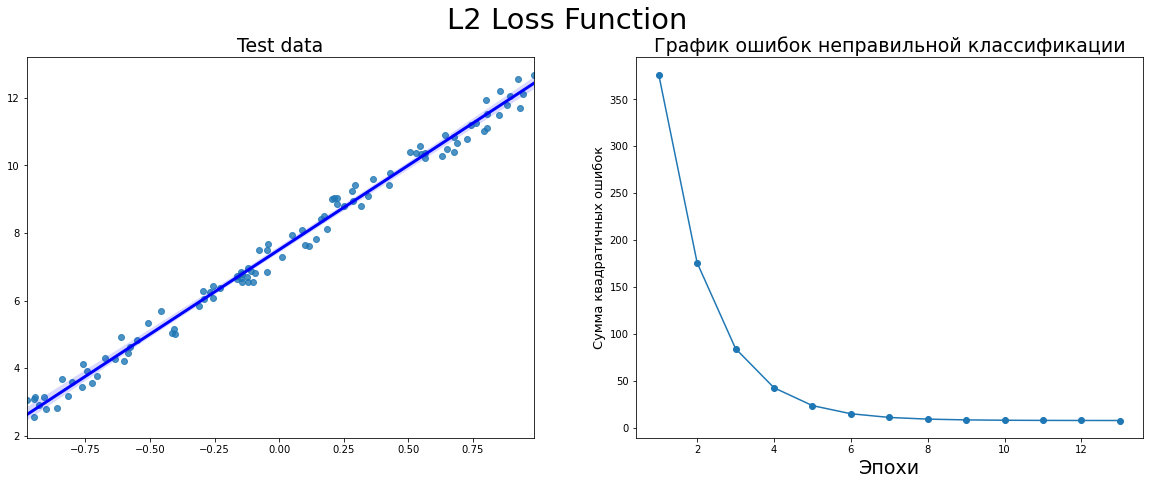

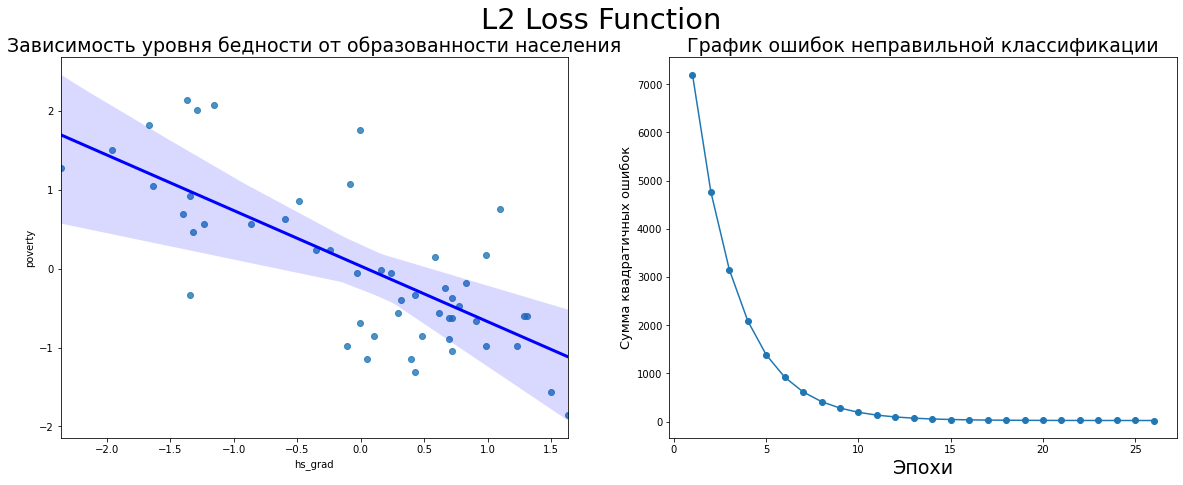

In [34]:
def update_weights_SSE(w, b, X, Y, learning_rate):
    w_deriv = 0
    b_deriv = 0

    N = len(X)
    for i in range(N-1):
        # Вычисление частных производных
        w_deriv += (- 2 * X[i]) * (- w * X[i] - b + Y[i])
        b_deriv += 2 * w * X[i] +  2 * b -  2 * Y[i]
    
    w -= learning_rate * (w_deriv / float(N))
    b -= learning_rate * (b_deriv / float(N)) 
    return w, b

#_______________________________________________________________________________________________Test data
X, Y = get_test_data()
wlist, blist, errors = gradient_descent(X, Y, 
                                        update_weights_SSE, loss_function=L2,
                                        learning_rate=0.5, n_iter=100)
best_w, best_b = wlist[-1], blist[-1]
visualize_gradient_descent(X, Y,
                           best_w, best_b, errors,
                           title_loss_func='L2 Loss Function',
                           ylabel_second_plot='Сумма квадратичных ошибок',)
#_______________________________________________________________________________________________ Real data
X, Y = get_real_data()
wlist, blist, errors = gradient_descent(X, Y, 
                                        update_weights_SSE, loss_function=L2,
                                        learning_rate=0.1, n_iter=100)
best_w, best_b = wlist[-1], blist[-1]
visualize_gradient_descent(X, Y,
                           best_w, best_b, errors,
                           title_loss_func='L2 Loss Function',
                           title_first_plot="Зависимость уровня бедности от образованности населения",
                           ylabel_second_plot='Сумма квадратичных ошибок',)

Чтобы понять, как можно вывести функцию издержек для логистической регрессии, определим правдоподобие $L$.

$L(w) = P(y|x;w) \mkern 5mu = \mkern 5mu \prod\limits_{i=1}^n (\phi (z_i))^{y_i} \mkern 10mu (1-\phi({z_i})^{1-y_i} \mkern 10mu \rightarrow \mkern 10mu max$

1. Если $y_i = +1$ (т.е. в соответствии с обучающей выборкой объект относится к классу +1), а наш алгоритм $ \phi (z_i)$ определяет вероятность отнесения объекта к классу $+1$ равной 0.9, то вот этот кусочек правдоподобия выборки будет рассчитываться так:
    <br>$0.9^1 \centerdot (1-0.9)^{(1-1)}= 0.9^1 \centerdot 0.1^0 = 0.9$
2. Если $y_i = +1$, а $ \phi (z_i) = 0.1$, то расчет будет таким:
    <br>$0.1^1 \centerdot (1-0.1)^{(1-1)}= 0.1^1 \centerdot 0.9^0 = 0.1$

3. Если $y_i = 0$, а $ \phi (z_i) = 0.1$, то расчет будет таким:
    <br>$0.1^0 \centerdot (1-0.1)^{(1-0)}= 0.1^0 \centerdot 0.9^1 = 0.9$

4. Если $y_i = 0$, а $ \phi (z_i) = 0.9$, то расчет будет таким:
    <br>$0.9^0 \centerdot (1-0.9)^{(1-0)}= 0.9^0 \centerdot 0.1^1 = 0.1$

>**Примечание**:
  - Классификация объектов происходит на $1$ и $0$.
  - $ \phi (z_i) = \sigma(\vec{w}^T \vec{x_i} + b) $
  - Функция правдоподобия будет максимизироваться в случаях 1 и 3 или в общем случае — при правильно отгаданных значениях вероятностей отнесения объекта к классу


На практике легче довести до максимума (натуральный) логарифм этого уравнения, который называется функцией логарифмического правдоподобия.
<br>$l(w) = logL(w)=  \sum\limits_{i=1}^n[y_i \mkern 2mu log_e \mkern 5mu \phi (z_i) + (1-y_i) \mkern 2mu log_e \mkern 5mu (1 - \phi (z_i))] \rightarrow max$

Перепишем функцию, для применения градиентного метода.
<br>$ J(w) = \sum\limits_{i=1}^n[-y_i \mkern 2mu log_e \mkern 5mu \phi (z_i) - (1-y_i) \mkern 2mu log_e \mkern 5mu (1 - \phi (z_i)) ] \rightarrow min$

**Примечание**:
>Можно заметить, что первый член обращается в ноль, если $y=0$, а второй — если $y=1$.
>
> $ J(w) = {\begin{cases}
            -\mkern 2mu log_e \mkern 5mu \phi (z) & \text{если } y = 1\\
           - \mkern 2mu log_e \mkern 5mu (1 - \phi (z))     & \text{если } y = 0
           \end{cases}}$

Градиент для $ J(w)$:

$ \displaystyle{
\frac{\partial J(w)}{\partial w} =
    \left( y \frac{1}{\phi(z)}-(1-y) \frac{1}{1-\phi(z)} \right) \frac{\partial}{\partial w}\phi(z) = \\\
    = \left( y \frac{1}{\phi(z)}-(1-y) \frac{1}{1-\phi(z)} \right) \phi(z) (1-\phi(z)) x = x(y- \phi(z))
}$

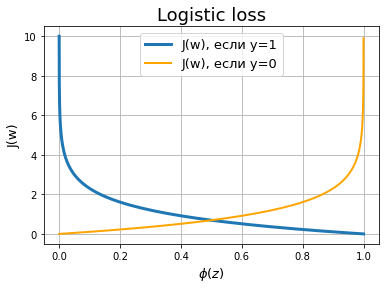

In [35]:
visualize_logistic_loss()

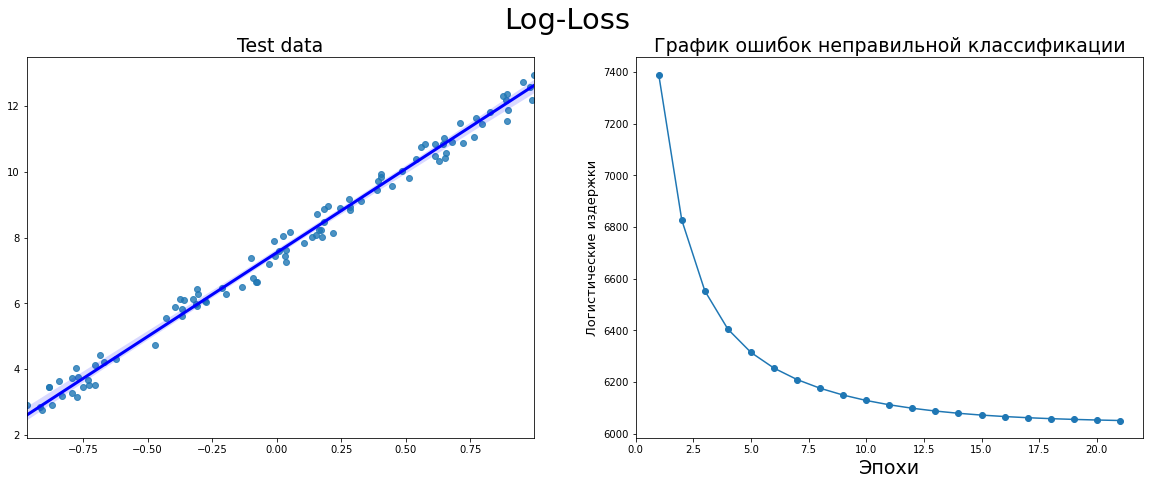

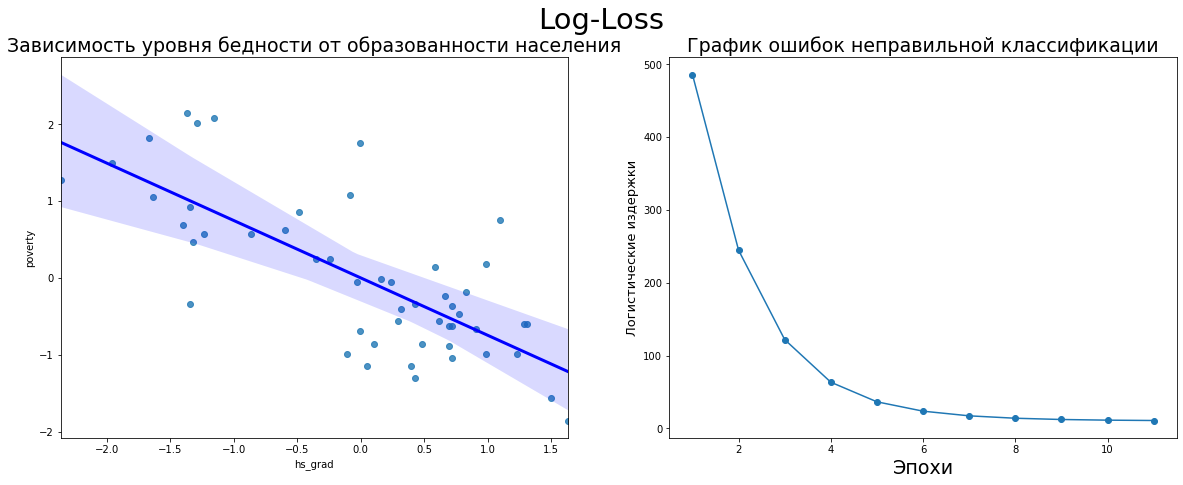

In [36]:
def BCE(yhat, output):
    output = sigmoid(output)
    return np.absolute(-yhat.dot(np.log(output)) - ((1 - yhat).dot(np.log(1 - output))))

def update_weights_BCE(w, b, X, Y, learning_rate):
    w_deriv = 0
    b_deriv = 0

    N = len(X)
    for i in range(N-1):
        # Вычисление частных производных
        w_deriv += (- X[i]) * (- w * X[i] - b + Y[i])
        b_deriv +=  w * X[i] +   b -  Y[i]
    
    w -= learning_rate * (w_deriv / float(N))
    b -= learning_rate * (b_deriv / float(N)) 
    return w, b

#_______________________________________________________________________________________________Test data
X, Y = get_test_data()
wlist, blist, errors = gradient_descent(X, Y, 
                                        update_weights_BCE, loss_function=BCE,
                                        learning_rate=0.6, n_iter=100)
best_w, best_b = wlist[-1], blist[-1]
visualize_gradient_descent(X, Y,
                           best_w, best_b, errors,
                           title_loss_func='Log-Loss',
                           ylabel_second_plot='Логистические издержки',)
#_______________________________________________________________________________________________ Real data
X, Y = get_real_data()
wlist, blist, errors = gradient_descent(X, Y, 
                                        update_weights_BCE, loss_function=BCE,
                                        learning_rate=0.5, n_iter=100)
best_w, best_b = wlist[-1], blist[-1]
visualize_gradient_descent(X, Y,
                           best_w, best_b, errors,
                           title_loss_func='Log-Loss',
                           title_first_plot="Зависимость уровня бедности от образованности населения",
                           ylabel_second_plot='Логистические издержки',)